In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [147]:
# Load the data
data = pd.read_csv('Resources/clean_property_data.csv')

# Print the columns to check for the correct column name
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [148]:

# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()

In [149]:

# Check the cleaned column names
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [150]:
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      37910 non-null  float64
 1   nbhd          37910 non-null  float64
 2   style         37910 non-null  object 
 3   extwall       37910 non-null  object 
 4   stories       37910 non-null  float64
 5   year_built    37910 non-null  float64
 6   rooms         37910 non-null  float64
 7   finishedsqft  37910 non-null  float64
 8   units         37910 non-null  int64  
 9   bdrms         37910 non-null  float64
 10  fbath         37910 non-null  float64
 11  hbath         37910 non-null  float64
 12  lotsize       37910 non-null  float64
 13  sale_date     37910 non-null  object 
 14  sale_price    37910 non-null  float64
 15  sale_year     37910 non-null  int64  
 16  sale_month    37910 non-null  int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 4.9+ MB


In [151]:
#Checking to make sure there are no nulls 
data.isnull().sum()

district        0
nbhd            0
style           0
extwall         0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
sale_year       0
sale_month      0
dtype: int64

In [152]:
#converting the sale date to datetime , becasue when imported here it couldnt read it as datetime
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      37910 non-null  float64       
 1   nbhd          37910 non-null  float64       
 2   style         37910 non-null  object        
 3   extwall       37910 non-null  object        
 4   stories       37910 non-null  float64       
 5   year_built    37910 non-null  float64       
 6   rooms         37910 non-null  float64       
 7   finishedsqft  37910 non-null  float64       
 8   units         37910 non-null  int64         
 9   bdrms         37910 non-null  float64       
 10  fbath         37910 non-null  float64       
 11  hbath         37910 non-null  float64       
 12  lotsize       37910 non-null  float64       
 13  sale_date     37910 non-null  datetime64[ns]
 14  sale_price    37910 non-null  float64       
 15  sale_year     37910 non-null  int64 

In [153]:
#dropping saledate b/c it's not needed for the model. We're going to use sale-year and sale-month
data = data.drop(columns=['sale_date'])
data

,district,nbhd,style,extwall,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,lotsize,sale_price,sale_year,sale_month
0,9.0,40.0,cape cod,aluminum/vinyl,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,33541.0,160000.0,2023,12
1,9.0,40.0,ranch,fiber cement/hardiplank,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,10607.0,387500.0,2023,8
2,9.0,40.0,ranch,aluminum/vinyl,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,8640.0,335000.0,2023,8
3,9.0,40.0,ranch,aluminum/vinyl,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,7200.0,250000.0,2023,6
4,9.0,40.0,colonial,aluminum/vinyl,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,7200.0,270000.0,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,milwaukee bungalow,aluminum / vinyl,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,3660.0,61500.0,2013,12
37906,14.0,4620.0,ranch,aluminum / vinyl,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,5120.0,65000.0,2013,12
37907,14.0,4700.0,ranch,aluminum / vinyl,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,5546.0,97500.0,2013,12
37908,14.0,4600.0,residence o/s,aluminum / vinyl,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,4560.0,149000.0,2013,12


In [154]:
# Converting all non-numerical vvalues to numerical category 
data_dummies = pd.get_dummies(data)
data_dummies

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9.0,40.0,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,9.0,40.0,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,9.0,40.0,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,9.0,40.0,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,9.0,40.0,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37906,14.0,4620.0,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37907,14.0,4700.0,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37908,14.0,4600.0,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


<!-- data["bathrooms_total"] = 
reduced_features_df = data[[]] -->

In [155]:
data["bathrooms_total"] = data["fbath"] + data["hbath"]
reduced_features_df = data[['finishedsqft', 'bdrms', 'bathrooms_total','sale_year','sale_price']]
reduced_features_df.head()

,finishedsqft,bdrms,bathrooms_total,sale_year,sale_price
0,1182.0,4.0,2.0,2023,160000.0
1,1880.0,3.0,2.0,2023,387500.0
2,1489.0,3.0,3.0,2023,335000.0
3,1209.0,3.0,2.0,2023,250000.0
4,1663.0,3.0,3.0,2023,270000.0


In [156]:
#creating the independent variables set 
X = reduced_features_df.drop(columns=['sale_price'])
X

,finishedsqft,bdrms,bathrooms_total,sale_year
0,1182.0,4.0,2.0,2023
1,1880.0,3.0,2.0,2023
2,1489.0,3.0,3.0,2023
3,1209.0,3.0,2.0,2023
4,1663.0,3.0,3.0,2023
...,...,...,...,...
37905,988.0,3.0,1.0,2013
37906,1119.0,3.0,1.0,2013
37907,725.0,2.0,1.0,2013
37908,937.0,2.0,1.0,2013


In [157]:
# creating the dependent variable set 
y = reduced_features_df['sale_price']
y

0        160000.0
1        387500.0
2        335000.0
3        250000.0
4        270000.0
           ...   
37905     61500.0
37906     65000.0
37907     97500.0
37908    149000.0
37909    102900.0
Name: sale_price, Length: 37910, dtype: float64

In [158]:
# spliting data into training and testing 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [159]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [160]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
finishedsqft,51.225974
bdrms,-188.966162
bathrooms_total,28536.452046
sale_year,7260.748888


In [161]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7452883233.08873


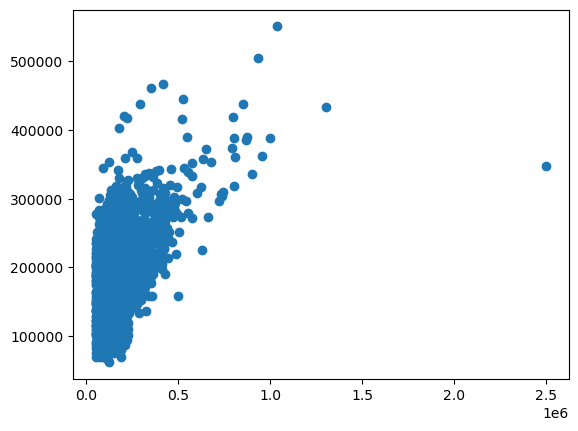

In [162]:
plt.scatter(y_test, y_pred)

In [163]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,225128.870572
1,152051.183207
2,144224.350233
3,140648.978135
4,149047.906351
...,...
3786,174507.215202
3787,126257.372874
3788,185649.582703
3789,191960.651494


In [164]:
y_test

7901     330000.0
198      124000.0
13573    232500.0
34758    111250.0
22900    146500.0
           ...   
22162    188400.0
19191    125000.0
9771     252000.0
32525     55000.0
10709     98900.0
Name: sale_price, Length: 3791, dtype: float64

In [165]:
# determining accuracy score 
model.score(X_test, y_test)

0.287048217317572

## Random Forest Regressor

In [166]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [167]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6943154986.463242


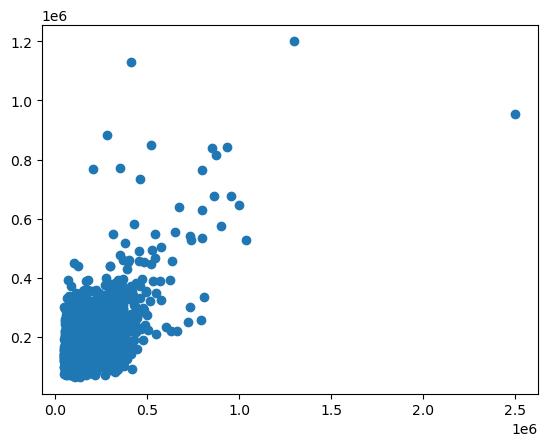

In [168]:
plt.scatter(y_test, y_pred)

In [169]:
model.score(X_test, y_test)

0.3358094350570079

House Price Prediction Using Elle's Model and the Previous (Unfiltered) Dataset

In [170]:
listings_data_df = pd.read_csv("Resources/original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [171]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [172]:
X_test.head()

,finishedsqft,bdrms,bathrooms_total,sale_year
7901,2059.0,7.0,2.0,2022
198,1033.0,3.0,1.0,2023
13573,1160.0,2.0,1.0,2021
34758,1529.0,3.0,2.0,2014
22900,1126.0,3.0,2.0,2018


In [173]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'bdrms', 'Bathroom':'bathrooms_total','Area':'finishedsqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [174]:
listings_data_df.isnull().sum()

Street             0
City               0
State              0
Zipcode            0
Latitude           0
Longitude          0
bdrms              0
bathrooms_total    0
finishedsqft       1
Lotsize            5
Price              0
MarketEstimate     7
dtype: int64

In [175]:
listings_data_df=listings_data_df.dropna(subset=['finishedsqft','Lotsize'])
listings_data_df.isnull().sum()

Street             0
City               0
State              0
Zipcode            0
Latitude           0
Longitude          0
bdrms              0
bathrooms_total    0
finishedsqft       0
Lotsize            0
Price              0
MarketEstimate     4
dtype: int64

In [176]:
prediction1_df = listings_data_df.copy()
prediction1_df['sale_year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate,sale_year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [177]:
X_pred1 = prediction1_df[['finishedsqft', 'bdrms', 'bathrooms_total','sale_year']]
y_predicted_sales1 = model.predict(X_pred1)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['Price Difference'] = listings_data_df['Price'] - listings_data_df['2024 Forecasted House Price']
listings_data_df['Market Estimate Difference'] = listings_data_df['MarketEstimate'] - listings_data_df['2024 Forecasted House Price']
listings_data_df

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,Price Difference,Market Estimate Difference
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,186542.500000,-151642.500000,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,279552.000000,-154652.000000,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,198693.333333,-63693.333333,-65893.333333
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,238080.500000,-103080.500000,-101780.500000
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,117843.412709,19656.587291,21856.587291
6,North 17th STREET NORTH North,Milwaukee,WI,53206,43.069004,-87.934100,3,2,902.0,0.00,140000,NaN,199782.170000,-59782.170000,NaN
7,West Eden PLACE,Milwaukee,WI,53220,42.980330,-88.002720,3,1,1156.0,7840.80,144900,157300.0,169102.000000,-24202.000000,-11802.000000
8,South 8th STREET,Milwaukee,WI,53215,42.996044,-87.921000,3,1,1400.0,3484.80,155000,156700.0,173371.857143,-18371.857143,-16671.857143
10,North Sherman BOULEVARD,Milwaukee,WI,53216,43.077385,-87.966930,4,2,1972.0,0.96,163500,162900.0,312372.500000,-148872.500000,-149472.500000
11,North 78th STREET,Milwaukee,WI,53222,43.074600,-88.009514,2,1,953.0,4791.60,179000,192900.0,169651.666667,9348.333333,23248.333333
